In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CarbonData = pd.read_csv('downloads\CarbonData.csv')
IdMap = pd.read_csv('downloads\IdMap.csv')
BenchmarkHoldings = pd.read_csv('downloads\BenchmarkHoldings.csv')
ProtfolioHoldings = pd.read_csv('downloads\PortfolioHoldings.csv')

QUESTION 1 :
WACI_PPROTFOLIOHOLDINGS

In [3]:
ProtfolioHoldings.head()

,Portfolio,SecurityType,Ticker,Units,Price
0,RI_20,Equity,QBE,54796,34.38
1,RI_20,Equity,ANZ,228647,22.03
2,RI_20,Equity,BHP,414259,41.25
3,RI_20,Equity,CBA,139637,90.38
4,RI_20,Equity,COL,109341,17.81


In [4]:
ProtfolioHoldings['weight'] = (ProtfolioHoldings['Units']*ProtfolioHoldings['Price'])

In [5]:
ProtfolioHoldings['wt'] = ((ProtfolioHoldings['weight']/ProtfolioHoldings['weight'].sum()))

In [6]:
ProtfolioHoldings.head()

,Portfolio,SecurityType,Ticker,Units,Price,weight,wt
0,RI_20,Equity,QBE,54796,34.38,1883886.48,0.019029
1,RI_20,Equity,ANZ,228647,22.03,5037093.41,0.050880
2,RI_20,Equity,BHP,414259,41.25,17088183.75,0.172608
3,RI_20,Equity,CBA,139637,90.38,12620392.06,0.127479
4,RI_20,Equity,COL,109341,17.81,1947363.21,0.019670


In [17]:
CarbonData = CarbonData.rename(columns={"SEDOL" : "sedol"})

In [8]:
ProtfolioHoldings = ProtfolioHoldings.rename(columns={"Ticker" : "ticker"})

In [22]:
new_protfolioholdings = pd.merge(ProtfolioHoldings,IdMap, on='ticker')

In [27]:
new_protfolioholdings1 = pd.merge(new_protfolioholdings,CarbonData, on='sedol')

In [28]:
new_protfolioholdings1.head()

,Portfolio,SecurityType,ticker,Units,Price,weight,wt,sedol,companyname,CategoryGroup,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD
0,RI_20,Equity,ANZ,228647,22.03,5037093.41,0.050880,6065586,ANZ Group Holdings Limited,2,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000
1,RI_20,Equity,BHP,414259,41.25,17088183.75,0.172608,6144690,BHP Group Ltd,2,BHP GROUP LIMITED,351,16005,13887,12395180000
2,RI_20,Equity,CBA,139637,90.38,12620392.06,0.127479,6215035,Commonwealth Bank of Australia,2,COMMONWEALTH BANK OF AUSTRALIA,6619,68868,42979,16011380000
3,RI_20,Equity,COL,109341,17.81,1947363.21,0.019670,BYWR0T5,Coles Group Ltd.,1,COLES GROUP LIMITED,33086,1130584,3456998,16234300000
4,RI_20,Equity,CSL,39419,269.06,10606076.14,0.107132,6185495,CSL Limited,1,CSL LIMITED,6667,83429,47565,19787820000


In [29]:
new_protfolioholdings1['WACI'] = new_protfolioholdings1['wt']*((new_protfolioholdings1['EMISSIONS_SCOPE_1']+new_protfolioholdings1['EMISSIONS_SCOPE_2'])/new_protfolioholdings1['REVENUE_USD'])

In [30]:
new_protfolioholdings1.head()

,Portfolio,SecurityType,ticker,Units,Price,weight,wt,sedol,companyname,CategoryGroup,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD,WACI
0,RI_20,Equity,ANZ,228647,22.03,5037093.41,0.050880,6065586,ANZ Group Holdings Limited,2,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000,2.782090e-06
1,RI_20,Equity,BHP,414259,41.25,17088183.75,0.172608,6144690,BHP Group Ltd,2,BHP GROUP LIMITED,351,16005,13887,12395180000,2.277639e-07
2,RI_20,Equity,CBA,139637,90.38,12620392.06,0.127479,6215035,Commonwealth Bank of Australia,2,COMMONWEALTH BANK OF AUSTRALIA,6619,68868,42979,16011380000,6.010089e-07
3,RI_20,Equity,COL,109341,17.81,1947363.21,0.019670,BYWR0T5,Coles Group Ltd.,1,COLES GROUP LIMITED,33086,1130584,3456998,16234300000,1.409964e-06
4,RI_20,Equity,CSL,39419,269.06,10606076.14,0.107132,6185495,CSL Limited,1,CSL LIMITED,6667,83429,47565,19787820000,4.877834e-07


In [31]:
protfolioholdings_WACI = new_protfolioholdings1['WACI'].sum()
protfolioholdings_WACI

0.00013295976460563045

WACI_BENCHMARKHOLDINGS

In [33]:
BenchmarkHoldings.head()

,indexCode,ticker,IndexWeight
0,ASX_20,ANZ,0.039279
1,ASX_20,WBC,0.035721
2,ASX_20,FMG,0.025070
3,ASX_20,TLS,0.049039
4,ASX_20,BHP,0.011695


In [34]:
new_BenchmarkHoldings = pd.merge(BenchmarkHoldings,IdMap, on='ticker')

In [35]:
new_BenchmarkHoldings.head()

,indexCode,ticker,IndexWeight,sedol,companyname,CategoryGroup
0,ASX_20,ANZ,0.039279,6065586,ANZ Group Holdings Limited,2
1,ASX_20,WBC,0.035721,6076146,Westpac Banking Corporation,3
2,ASX_20,FMG,0.025070,6086253,Fortescue Metals Group Ltd,1
3,ASX_20,TLS,0.049039,6087289,Telstra Group Limited,3
4,ASX_20,BHP,0.011695,6144690,BHP Group Ltd,2


In [36]:
new_BenchmarkHoldings1 = pd.merge(new_BenchmarkHoldings,CarbonData, on='sedol')

In [38]:
new_BenchmarkHoldings1.head()

,indexCode,ticker,IndexWeight,sedol,companyname,CategoryGroup,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD
0,ASX_20,ANZ,0.039279,6065586,ANZ Group Holdings Limited,2,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000
1,ASX_20,WBC,0.035721,6076146,Westpac Banking Corporation,3,WESTPAC BANKING CORPORATION,2220000,330000,254730000,16540870000
2,ASX_20,FMG,0.025070,6086253,Fortescue Metals Group Ltd,1,FORTESCUE METALS GROUP LTD,109542,222034,38573,10310000000
3,ASX_20,TLS,0.049039,6087289,Telstra Group Limited,3,TELSTRA GROUP LIMITED,5638,5873,18368,3583610000
4,ASX_20,BHP,0.011695,6144690,BHP Group Ltd,2,BHP GROUP LIMITED,351,16005,13887,12395180000


In [39]:
new_BenchmarkHoldings1['WACI'] = new_BenchmarkHoldings1['IndexWeight']*((new_BenchmarkHoldings1['EMISSIONS_SCOPE_1']+new_BenchmarkHoldings1['EMISSIONS_SCOPE_2'])/new_BenchmarkHoldings1['REVENUE_USD'])

In [40]:
new_BenchmarkHoldings1.head()

,indexCode,ticker,IndexWeight,sedol,companyname,CategoryGroup,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD,WACI
0,ASX_20,ANZ,0.039279,6065586,ANZ Group Holdings Limited,2,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000,2.147746e-06
1,ASX_20,WBC,0.035721,6076146,Westpac Banking Corporation,3,WESTPAC BANKING CORPORATION,2220000,330000,254730000,16540870000,5.506839e-06
2,ASX_20,FMG,0.025070,6086253,Fortescue Metals Group Ltd,1,FORTESCUE METALS GROUP LTD,109542,222034,38573,10310000000,8.062623e-07
3,ASX_20,TLS,0.049039,6087289,Telstra Group Limited,3,TELSTRA GROUP LIMITED,5638,5873,18368,3583610000,1.575188e-07
4,ASX_20,BHP,0.011695,6144690,BHP Group Ltd,2,BHP GROUP LIMITED,351,16005,13887,12395180000,1.543224e-08


In [41]:
WACI_benchmarkholdings = new_BenchmarkHoldings1['WACI'].sum()
WACI_benchmarkholdings

0.00016113915360866095

QUESTION 2 - WACI WITHIN EACH CATEGORY GROUP

 PROTFOLIOHOLDINGS

In [44]:
new_protfolioholdings1.head()

,Portfolio,SecurityType,ticker,Units,Price,weight,wt,sedol,companyname,CategoryGroup,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD,WACI
0,RI_20,Equity,ANZ,228647,22.03,5037093.41,0.050880,6065586,ANZ Group Holdings Limited,2,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000,2.782090e-06
1,RI_20,Equity,BHP,414259,41.25,17088183.75,0.172608,6144690,BHP Group Ltd,2,BHP GROUP LIMITED,351,16005,13887,12395180000,2.277639e-07
2,RI_20,Equity,CBA,139637,90.38,12620392.06,0.127479,6215035,Commonwealth Bank of Australia,2,COMMONWEALTH BANK OF AUSTRALIA,6619,68868,42979,16011380000,6.010089e-07
3,RI_20,Equity,COL,109341,17.81,1947363.21,0.019670,BYWR0T5,Coles Group Ltd.,1,COLES GROUP LIMITED,33086,1130584,3456998,16234300000,1.409964e-06
4,RI_20,Equity,CSL,39419,269.06,10606076.14,0.107132,6185495,CSL Limited,1,CSL LIMITED,6667,83429,47565,19787820000,4.877834e-07


In [45]:
new_protfolioholdings1['CategoryGroup1'] = new_protfolioholdings1.loc[:, 'CategoryGroup']

In [47]:
new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup'] == 1, 'CategoryGroup'] = (new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup'] == 1, 'weight'] / (new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup'] == 1, 'weight'].sum()))
new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup'] == 2, 'CategoryGroup'] = (new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup'] == 2, 'weight'] / (new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup'] == 2, 'weight'].sum()))
new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup'] == 3, 'CategoryGroup'] = (new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup'] == 3, 'weight'] / (new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup'] == 3, 'weight'].sum()))

In [51]:
new_protfolioholdings1 = new_protfolioholdings1.rename(columns={"CategoryGroup" : "CategoryGroup_wt"})

In [52]:
new_protfolioholdings1.head()

,Portfolio,SecurityType,ticker,Units,Price,weight,wt,sedol,companyname,CategoryGroup_wt,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD,WACI,CategoryGroup1
0,RI_20,Equity,ANZ,228647,22.03,5037093.41,0.050880,6065586,ANZ Group Holdings Limited,0.109440,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000,2.782090e-06,2
1,RI_20,Equity,BHP,414259,41.25,17088183.75,0.172608,6144690,BHP Group Ltd,0.371272,BHP GROUP LIMITED,351,16005,13887,12395180000,2.277639e-07,2
2,RI_20,Equity,CBA,139637,90.38,12620392.06,0.127479,6215035,Commonwealth Bank of Australia,0.274201,COMMONWEALTH BANK OF AUSTRALIA,6619,68868,42979,16011380000,6.010089e-07,2
3,RI_20,Equity,COL,109341,17.81,1947363.21,0.019670,BYWR0T5,Coles Group Ltd.,0.067514,COLES GROUP LIMITED,33086,1130584,3456998,16234300000,1.409964e-06,1
4,RI_20,Equity,CSL,39419,269.06,10606076.14,0.107132,6185495,CSL Limited,0.367705,CSL LIMITED,6667,83429,47565,19787820000,4.877834e-07,1


In [55]:
new_protfolioholdings1['WACI_Category_wise'] = new_protfolioholdings1['CategoryGroup_wt']*((new_protfolioholdings1['EMISSIONS_SCOPE_1']+new_protfolioholdings1['EMISSIONS_SCOPE_2'])/new_protfolioholdings1['REVENUE_USD'])

In [56]:
new_protfolioholdings1.head()

,Portfolio,SecurityType,ticker,Units,Price,weight,wt,sedol,companyname,CategoryGroup_wt,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD,WACI,CategoryGroup1,WACI_Category,WACI_Category_wise
0,RI_20,Equity,ANZ,228647,22.03,5037093.41,0.050880,6065586,ANZ Group Holdings Limited,0.109440,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000,2.782090e-06,2,5.984157e-06,5.984157e-06
1,RI_20,Equity,BHP,414259,41.25,17088183.75,0.172608,6144690,BHP Group Ltd,0.371272,BHP GROUP LIMITED,351,16005,13887,12395180000,2.277639e-07,2,4.899105e-07,4.899105e-07
2,RI_20,Equity,CBA,139637,90.38,12620392.06,0.127479,6215035,Commonwealth Bank of Australia,0.274201,COMMONWEALTH BANK OF AUSTRALIA,6619,68868,42979,16011380000,6.010089e-07,2,1.292745e-06,1.292745e-06
3,RI_20,Equity,COL,109341,17.81,1947363.21,0.019670,BYWR0T5,Coles Group Ltd.,0.067514,COLES GROUP LIMITED,33086,1130584,3456998,16234300000,1.409964e-06,1,4.839356e-06,4.839356e-06
4,RI_20,Equity,CSL,39419,269.06,10606076.14,0.107132,6185495,CSL Limited,0.367705,CSL LIMITED,6667,83429,47565,19787820000,4.877834e-07,1,1.674197e-06,1.674197e-06


In [59]:
new_protfolioholdings1.drop(['WACI_Category'], axis =1)

,Portfolio,SecurityType,ticker,Units,Price,weight,wt,sedol,companyname,CategoryGroup_wt,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD,WACI,CategoryGroup1,WACI_Category_wise
0,RI_20,Equity,ANZ,228647,22.03,5037093.41,0.050880,6065586,ANZ Group Holdings Limited,0.109440,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000,2.782090e-06,2,5.984157e-06
1,RI_20,Equity,BHP,414259,41.25,17088183.75,0.172608,6144690,BHP Group Ltd,0.371272,BHP GROUP LIMITED,351,16005,13887,12395180000,2.277639e-07,2,4.899105e-07
2,RI_20,Equity,CBA,139637,90.38,12620392.06,0.127479,6215035,Commonwealth Bank of Australia,0.274201,COMMONWEALTH BANK OF AUSTRALIA,6619,68868,42979,16011380000,6.010089e-07,2,1.292745e-06
3,RI_20,Equity,COL,109341,17.81,1947363.21,0.019670,BYWR0T5,Coles Group Ltd.,0.067514,COLES GROUP LIMITED,33086,1130584,3456998,16234300000,1.409964e-06,1,4.839356e-06
4,RI_20,Equity,CSL,39419,269.06,10606076.14,0.107132,6185495,CSL Limited,0.367705,CSL LIMITED,6667,83429,47565,19787820000,4.877834e-07,1,1.674197e-06
5,RI_20,Equity,FMG,138577,17.53,2429254.81,0.024538,6086253,Fortescue Metals Group Ltd,0.084220,FORTESCUE METALS GROUP LTD,109542,222034,38573,10310000000,7.891548e-07,1,2.708581e-06
6,RI_20,Equity,GMG,139121,17.84,2481918.64,0.025070,B03FYZ4,Goodman Group,0.053924,GOODMAN GROUP,6424,104984,153697,17493870000,1.596551e-07,2,3.434113e-07
7,RI_20,Equity,MQG,29511,164.51,4854854.61,0.049039,B28YTC2,Macquarie Group Ltd.,0.248184,MACQUARIE GROUP LIMITED.,1397980,843293,741,4001580000,2.746655e-05,3,1.390071e-04
8,RI_20,Equity,NAB,263061,27.39,7205240.79,0.072780,6624608,National Australia Bank Limited,0.249800,NATIONAL AUSTRALIA BANK LIMITED,5357000,8200,53188000,16452630000,2.373361e-05,1,8.145981e-05
9,RI_20,Equity,RIO,30377,102.70,3119717.90,0.031512,6220103,Rio Tinto Limited,0.108158,RIO TINTO LIMITED,9200000,3100000,328500000,65098000000,5.954118e-06,1,2.043606e-05


In [70]:
c1_WACI_PH = new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup1'] == 1, 'WACI'].sum()
c2_WACI_PH = new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup1'] == 2, 'WACI'].sum()
c3_WACI_PH = new_protfolioholdings1.loc[new_protfolioholdings1['CategoryGroup1'] == 3, 'WACI'].sum()


In [100]:
print(c1_WACI_PH,c2_WACI_PH,c3_WACI_PH)

3.4381608384864054e-05 5.106477330728995e-05 4.751338291347646e-05


In [72]:
new_protfolioholdings1['WACI'].sum()

0.00013295976460563045

In [73]:
c1_contribution_PH = (c1_WACI_PH/new_protfolioholdings1['WACI'].sum())*100
c2_contribution_PH = (c2_WACI_PH/new_protfolioholdings1['WACI'].sum())*100
c3_contribution_PH = (c3_WACI_PH/new_protfolioholdings1['WACI'].sum())*100

In [74]:
print(c1_contribution_PH,c2_contribution_PH,c3_contribution_PH)

25.858656178312835 38.40618510325455 35.735158718432636


BENCHMARKHOLDINGS

In [79]:
new_BenchmarkHoldings1.head()

,indexCode,ticker,IndexWeight,sedol,companyname,CategoryGroup,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD,WACI
0,ASX_20,ANZ,0.039279,6065586,ANZ Group Holdings Limited,2,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000,2.147746e-06
1,ASX_20,WBC,0.035721,6076146,Westpac Banking Corporation,3,WESTPAC BANKING CORPORATION,2220000,330000,254730000,16540870000,5.506839e-06
2,ASX_20,FMG,0.025070,6086253,Fortescue Metals Group Ltd,1,FORTESCUE METALS GROUP LTD,109542,222034,38573,10310000000,8.062623e-07
3,ASX_20,TLS,0.049039,6087289,Telstra Group Limited,3,TELSTRA GROUP LIMITED,5638,5873,18368,3583610000,1.575188e-07
4,ASX_20,BHP,0.011695,6144690,BHP Group Ltd,2,BHP GROUP LIMITED,351,16005,13887,12395180000,1.543224e-08


In [80]:
new_BenchmarkHoldings1['CategoryGroup1'] = new_BenchmarkHoldings1.loc[:, 'CategoryGroup']

In [83]:
new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup'] == 1, 'CategoryGroup'] = (new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup'] == 1, 'IndexWeight'] / (new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup'] == 1, 'IndexWeight'].sum()))
new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup'] == 2, 'CategoryGroup'] = (new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup'] == 2, 'IndexWeight'] / (new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup'] == 2, 'IndexWeight'].sum()))
new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup'] == 3, 'CategoryGroup'] = (new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup'] == 3, 'IndexWeight'] / (new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup'] == 3, 'IndexWeight'].sum()))

In [84]:
new_BenchmarkHoldings1 = new_BenchmarkHoldings1.rename(columns={"CategoryGroup" : "CategoryGroup_wt"})

In [85]:
new_BenchmarkHoldings1.head()

,indexCode,ticker,IndexWeight,sedol,companyname,CategoryGroup_wt,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD,WACI,CategoryGroup1
0,ASX_20,ANZ,0.039279,6065586,ANZ Group Holdings Limited,0.211988,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000,2.147746e-06,2
1,ASX_20,WBC,0.035721,6076146,Westpac Banking Corporation,0.083511,WESTPAC BANKING CORPORATION,2220000,330000,254730000,16540870000,5.506839e-06,3
2,ASX_20,FMG,0.025070,6086253,Fortescue Metals Group Ltd,0.079791,FORTESCUE METALS GROUP LTD,109542,222034,38573,10310000000,8.062623e-07,1
3,ASX_20,TLS,0.049039,6087289,Telstra Group Limited,0.114647,TELSTRA GROUP LIMITED,5638,5873,18368,3583610000,1.575188e-07,3
4,ASX_20,BHP,0.011695,6144690,BHP Group Ltd,0.063119,BHP GROUP LIMITED,351,16005,13887,12395180000,1.543224e-08,2


In [86]:
new_BenchmarkHoldings1['WACI_Category_wise'] =new_BenchmarkHoldings1['CategoryGroup_wt']*((new_BenchmarkHoldings1['EMISSIONS_SCOPE_1']+new_BenchmarkHoldings1['EMISSIONS_SCOPE_2'])/new_BenchmarkHoldings1['REVENUE_USD'])

In [87]:
new_BenchmarkHoldings1.head()

,indexCode,ticker,IndexWeight,sedol,companyname,CategoryGroup_wt,ISSUER_NAME,EMISSIONS_SCOPE_1,EMISSIONS_SCOPE_2,EMISSIONS_SCOPE_3,REVENUE_USD,WACI,CategoryGroup1,WACI_Category_wise
0,ASX_20,ANZ,0.039279,6065586,ANZ Group Holdings Limited,0.211988,ANZ GROUP HOLDINGS LIMITED,554316,830812,36363650,25331650000,2.147746e-06,2,1.159144e-05
1,ASX_20,WBC,0.035721,6076146,Westpac Banking Corporation,0.083511,WESTPAC BANKING CORPORATION,2220000,330000,254730000,16540870000,5.506839e-06,3,1.287436e-05
2,ASX_20,FMG,0.025070,6086253,Fortescue Metals Group Ltd,0.079791,FORTESCUE METALS GROUP LTD,109542,222034,38573,10310000000,8.062623e-07,1,2.566114e-06
3,ASX_20,TLS,0.049039,6087289,Telstra Group Limited,0.114647,TELSTRA GROUP LIMITED,5638,5873,18368,3583610000,1.575188e-07,3,3.682610e-07
4,ASX_20,BHP,0.011695,6144690,BHP Group Ltd,0.063119,BHP GROUP LIMITED,351,16005,13887,12395180000,1.543224e-08,2,8.328820e-08


In [88]:
c1_WACI_BH = new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup1'] == 1, 'WACI'].sum()
c2_WACI_BH = new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup1'] == 2, 'WACI'].sum()
c3_WACI_BH = new_BenchmarkHoldings1.loc[new_BenchmarkHoldings1['CategoryGroup1'] == 3, 'WACI'].sum()


In [91]:
print(c1_WACI_BH,c3_WACI_BH,c3_WACI_BH)

3.2238385123101994e-05 8.489317918326324e-05 8.489317918326324e-05


In [89]:
c1_contribution_BH = (c1_WACI_BH/new_BenchmarkHoldings1['WACI'].sum())*100
c2_contribution_BH = (c2_WACI_BH/new_BenchmarkHoldings1['WACI'].sum())*100
c3_contribution_BH = (c3_WACI_BH/new_BenchmarkHoldings1['WACI'].sum())*100

In [90]:
print(c1_contribution_BH,c2_contribution_BH,c3_contribution_BH)

20.006549867697228 27.310301883036818 52.683148249265955


In [95]:
new_protfolioholdings1 = new_protfolioholdings1.sort_values(by=["CategoryGroup1"])

<AxesSubplot:xlabel='CategoryGroup1', ylabel='WACI_Category_wise'>

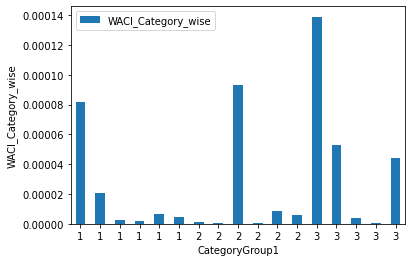

In [96]:
new_protfolioholdings1.plot(kind='bar', x='CategoryGroup1', y='WACI_Category_wise', xlabel = 'CategoryGroup1',ylabel='WACI_Category_wise',rot=0)

In [97]:
new_BenchmarkHoldings1 = new_BenchmarkHoldings1.sort_values(by=["CategoryGroup1"])

<AxesSubplot:xlabel='CategoryGroup1', ylabel='WACI_Category_wise'>

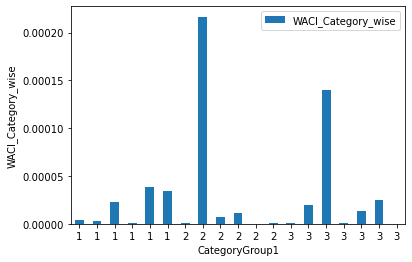

In [98]:
new_BenchmarkHoldings1.plot(kind='bar', x='CategoryGroup1', y='WACI_Category_wise', xlabel = 'CategoryGroup1',ylabel='WACI_Category_wise',rot=0)

ASSUMPTIONS:
    Merging dataframes where required and renaming few columns for easy pattern recognition.